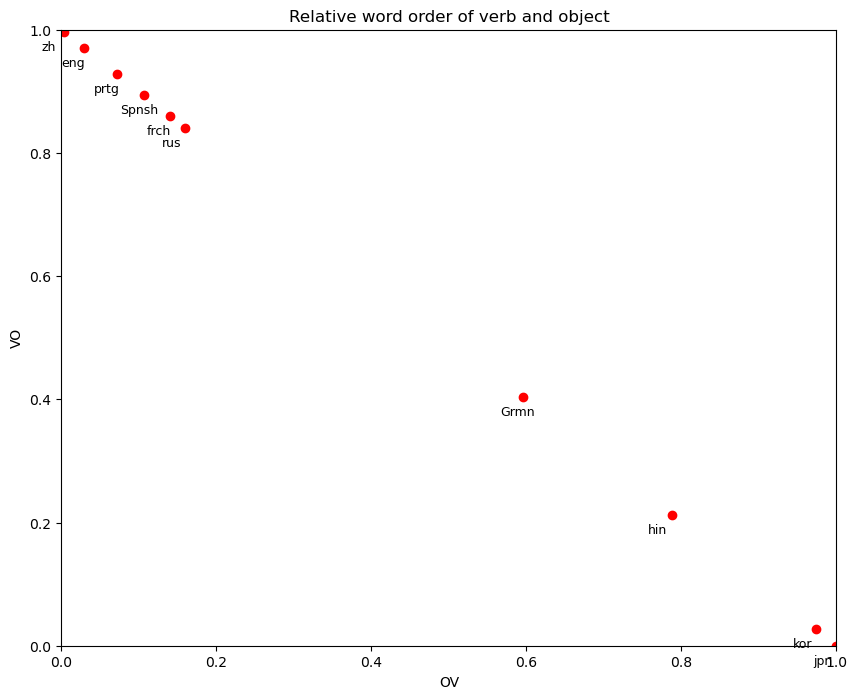

In [9]:
import matplotlib.pyplot as plt

def get_relative_count(file):
    vo_count = 0
    ov_count = 0

    with open(file, 'r', encoding='utf-8') as f:
        for line in f:
            if line.startswith('#'):
                continue 
            tokens = line.split('\t')
            if 'obj' in tokens:
                head_idx = int(tokens[6])
                obj_idx = int(tokens[0])
                if head_idx <= obj_idx:
                    vo_count += 1 
                else:
                    ov_count += 1

    # Calculate relative frequencies
    total_count = vo_count + ov_count
    vo_percentage = (vo_count / total_count) 
    ov_percentage = (ov_count / total_count) 
    
    return vo_percentage, ov_percentage

treebank_files = {
    'eng': 'en_gum-ud-test.conllu',  # English
    'zh': 'zh_gsd-ud-test.conllu',  # Chinese
    'hin': 'hi_hdtb-ud-test.conllu',  # Hindi
    'frch': 'fr_gsd-ud-test.conllu',  # French
    'Grmn':'de_gsd-ud-test.conllu',  # German
    'Spnsh':'es_gsd-ud-test.conllu',  # Spanish
    'rus':'ru_gsd-ud-test.conllu',  # Russian
    'jpn':'ja_gsd-ud-test.conllu',  # Japanese
    'kor':'ko_gsd-ud-test.conllu',  # Korean
    'prtg':'pt_gsd-ud-test.conllu'  # Portuguese
}

vo = []
ov = []

# Loop through each language and calculate relative counts
for lang, file in treebank_files.items():
    vo1, ov1 = get_relative_count(file)
    vo.append(vo1)
    ov.append(ov1)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(ov, vo, 'ro')
plt.title('Relative word order of verb and object')
plt.xlim([0, 1])  
plt.ylim([0, 1])
plt.xlabel('OV')  
plt.ylabel('VO')
for i, lang in enumerate(treebank_files.keys()):  # Add labels to each of the points
    plt.text(ov[i] - 0.03, vo[i] - 0.03, lang, fontsize=9)

plt.savefig('output.png')
plt.show()